In [ ]:
#PUNTO 5#
import numpy as np

def f(x):
    return np.exp(-x**2)

def trapecio(a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

def error_trapezoide(a, b, n):
    h = (b - a) / n
    return (-h**3 / 12)*(f(b) - 2*f((a+b)/2) + f(a))


a = 0
b = 1
n = 6
result = trapecio(0, 1, 6)
error_nu = error_trapezoide(0, 1, 6)
print(f"Valor aproximado de la integral: {result} y el error: {error_nu}")

Valor aproximado de la integral: 0.7451194124361793 y el error: 7.319526426364483e-05


In [7]:
import numpy as np
# PUNTO 6

def f(x):
    R = 0.5
    a = 0.01
    return (R + x) / np.sqrt(a**2 - x**2)

def trapecio(a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral


def simpson13(a, b, n):
    h = (b - a) / n
    suma = f(a) + f(b)
    for i in range(1, n, 2):
        suma += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        suma += 2 * f(a + i * h)
    return (h / 3) * suma

a = -0.009
b = 0.009
n = 1000


integral_trapecio = trapecio(a, b, n)
integral_simpson13 = simpson13(a, b, n)

print(f"Integral aproximada (método del trapecio): {integral_trapecio}")
print(f"Integral aproximada (regla de Simpson 1/3): {integral_simpson13}")

Integral aproximada (método del trapecio): 1.1197724490443015
Integral aproximada (regla de Simpson 1/3): 1.1197695152418095


In [ ]:
# PUNTO 7
R = 1
n = 200

x = np.linspace(-R, R, n + 1)
y = np.linspace(-R, R, n + 1)
X, Y = np.meshgrid(x, y)

dx = (x[-1] - x[0]) / n
dy = (y[-1] - y[0]) / n
dA = dx * dy


def f_z(x, y):
    r_squared = x**2 + y**2
    if r_squared <= R**2:
        return np.sqrt(R**2 - r_squared)
    else:
        return 0

f_z_vec = np.vectorize(f_z)

volumen_total = 0

for i in range(n):
    for j in range(n):
        x0, y0 = X[i, j], Y[i, j]
        x1, y1 = X[i+1, j], Y[i+1, j]
        x2, y2 = X[i, j+1], Y[i, j+1]
        x3, y3 = X[i+1, j+1], Y[i+1, j+1]


        z0 = f_z_vec(x0, y0)
        z1 = f_z_vec(x1, y1)
        z2 = f_z_vec(x2, y2)
        z3 = f_z_vec(x3, y3)


        z_promedio = (z0 + z1 + z2 + z3) / 4


        volumen_total += z_promedio * dA



print(f"Volumen numérico de la semiesfera: {volumen_total:.5f}")

In [25]:
# PUNTO 9
import sympy as sp

x, h = sp.symbols('x h')
x0, x1, x2, x3 = 0, h, 2*h, 3*h


L0 = ((x - x1)*(x - x2)*(x - x3)) / ((x0 - x1)*(x0 - x2)*(x0 - x3))
L1 = ((x - x0)*(x - x2)*(x - x3)) / ((x1 - x0)*(x1 - x2)*(x1 - x3))
L2 = ((x - x0)*(x - x1)*(x - x3)) / ((x2 - x0)*(x2 - x1)*(x2 - x3))
L3 = ((x - x0)*(x - x1)*(x - x2)) / ((x3 - x0)*(x3 - x1)*(x3 - x2))


L0_simplified = sp.simplify(L0)
L1_simplified = sp.simplify(L1)
L2_simplified = sp.simplify(L2)
L3_simplified = sp.simplify(L3)

L0_simplified, L1_simplified, L2_simplified, L3_simplified


integral_L0 = sp.integrate(L0_simplified, (x, 0, 3*h))
integral_L1 = sp.integrate(L1_simplified, (x, 0, 3*h))
integral_L2 = sp.integrate(L2_simplified, (x, 0, 3*h))
integral_L3 = sp.integrate(L3_simplified, (x, 0, 3*h))

print(integral_L0, integral_L1, integral_L2, integral_L3)


p1 = (2*a + b) / 3
p2 = (a + 2*b) / 3

print(f"Punto intermedio 1: {p1}")
print(f"Punto intermedio 2: {p2}")


3*h/8 9*h/8 9*h/8 3*h/8
Punto intermedio 1: 0.3333333333333333
Punto intermedio 2: 0.6666666666666666


In [ ]:
# PUNTO 10

x, h = sp.symbols('x h')

integrando = x * (x - h) * (x - 2*h) * (x - 3*h)

I = sp.integrate(integrando, (x, 0, 3*h))

I_simplificado = sp.simplify(I)
print(I_simplificado)

Punto intermedio 1: x1 = (2*a + b) / 3 = 0.3333333333333333
Punto intermedio 2: x2 = (a + 2*b) / 3 = 0.6666666666666666


In [15]:
import sympy as sp
import numpy as np
#PUNTO 15#

x = sp.symbols('x')

def newton_raphson(f_lambdified, f_prime_lambdified, x0, tol=1e-10, max_iter=100):
    x_k = x0
    for _ in range(max_iter):
        f_xk = f_lambdified(x_k)
        f_prime_xk = f_prime_lambdified(x_k)
        if abs(f_xk) < tol:
            break
        x_k = x_k - f_xk / f_prime_xk
    return x_k

x = sp.symbols('x')

def newton_raphson(f, f_prime, x0, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        fx = f(x0)
        fpx = f_prime(x0)
        if abs(fx) < tol:
            return x0
        x0 = x0 - fx / fpx
    return x0

def ceros_legendre_newton(n):
    P_n = sp.legendre(n, x)
    P_n_deriv = sp.diff(P_n, x)
    P_n_func = sp.lambdify(x, P_n, "numpy")
    P_n_deriv_func = sp.lambdify(x, P_n_deriv, "numpy")

    aproximaciones_iniciales = np.linspace(-1, 1, n)

    ceros = []
    for x0 in aproximaciones_iniciales:
        raiz = newton_raphson(P_n_func, P_n_deriv_func, x0)
        ceros.append(raiz)

    return ceros

def pesos_legendre_newton(n):
    ceros = ceros_legendre_newton(n)
    P_n = sp.legendre(n, x)
    P_n_deriv = sp.diff(P_n, x)
    P_n_deriv_func = sp.lambdify(x, P_n_deriv, "numpy")

    pesos = []
    for x_k in ceros:
        w_k = 2 / ((1 - x_k**2) * (P_n_deriv_func(x_k))**2)
        pesos.append(w_k)
    return pesos

ceros_pol_legendre_newton = [ceros_legendre_newton(n) for n in range(1, 21)]


pesos_pol_legendre_newton = [pesos_legendre_newton(n) for n in range(1, 21)]


for i, (ceros, pesos) in enumerate(zip(ceros_pol_legendre_newton, pesos_pol_legendre_newton), start=1):
    print(f"Grado {i}:")
    print(f"Ceros: {ceros}")
    print(f"Pesos: {pesos}\n")

Grado 1:
Ceros: [0.0]
Pesos: [2.0]

Grado 2:
Ceros: [-0.5773502691896257, 0.5773502691896257]
Pesos: [1.0, 1.0]

Grado 3:
Ceros: [-0.7745966692414835, 0.0, 0.7745966692414835]
Pesos: [0.5555555555555552, 0.8888888888888888, 0.5555555555555552]

Grado 4:
Ceros: [-0.861136311594053, -0.3399810435848563, 0.3399810435848563, 0.861136311594053]
Pesos: [0.3478548451374528, 0.6521451548625463, 0.6521451548625463, 0.3478548451374528]

Grado 5:
Ceros: [-0.9061798459386647, -0.5384693101108089, 0.0, 0.5384693101108089, 0.9061798459386647]
Pesos: [0.23692688505618723, 0.47862867049564534, 0.5688888888888889, 0.47862867049564534, 0.23692688505618723]

Grado 6:
Ceros: [-0.932469514203153, -0.6612093864662647, -0.2386191860832277, 0.2386191860832277, 0.6612093864662647, 0.932469514203153]
Pesos: [0.17132449237916791, 0.36076157304813855, 0.4679139345726838, 0.4679139345726838, 0.36076157304813855, 0.17132449237916791]

Grado 7:
Ceros: [-0.9491079123427594, -0.7415311855995048, -0.4058451513773972, 0

In [30]:
# PUNTO 16
n = 5
x_gauss, pesos_gauss = np.polynomial.legendre.leggauss(n)


def integrand_1(x):
    return 1 / (x**4 + 1)


def integrand_2(t):
    return t**3 / (1 + t**4)


integral_1 = sum(pesos_gauss * integrand_1(0.5 * (x_gauss + 1))) * 0.5


integral_2 = sum(pesos_gauss * integrand_2(1 / (0.5 * (x_gauss + 1)))) * 0.5

total_integral = integral_1 + integral_2

print(f"Integral aproximada (Gauss-Legendre): {total_integral}")

Integral aproximada (Gauss-Legendre): 1.2596633483550996


In [ ]:
# PUNTO 17
def f(x):
    return (x**3) / (np.exp(x) - 1)*(np.exp(-x))

n = 3

x_gauss, w_gauss = np.polynomial.laguerre.laggauss(n)

integral_estimada = np.sum(w_gauss * f(x_gauss))


I_exacta = (np.pi**4) / 15

n_values = range(2, 11)
errors = []
for n in n_values:
    x_gauss, w_gauss = np.polynomial.laguerre.laggauss(n)
    integral_estimada = np.sum(w_gauss * f(x_gauss))
    error_relativo = abs(integral_estimada - I_exacta) / I_exacta
    errors.append(error_relativo)
plt.plot(n_values, errors, marker='o')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.xlabel('Número de puntos de evaluación (n)')
plt.ylabel('Error relativo')
plt.title('Error relativo en la integración de Gauss-Laguerre')
plt.grid()
plt.show()

print(f"Integral estimada (n = {n}): {integral_estimada}")
print(f"Valor exacto de la integral: {I_exacta}")



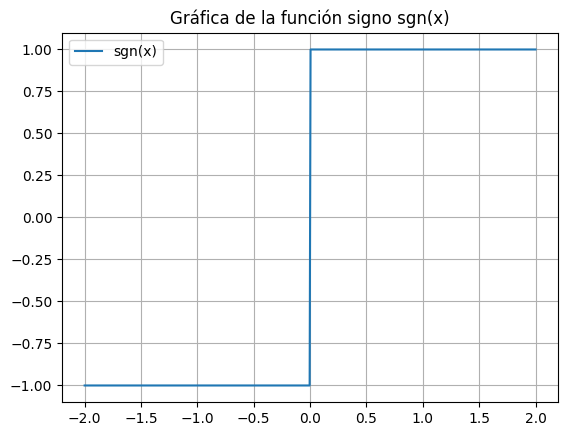

Point 1: -0.9879925180204854, Weight 1: 0.030753241996118647
Point 2: -0.937273392400706, Weight 2: 0.07036604748810807
Point 3: -0.8482065834104272, Weight 3: 0.10715922046717177
Point 4: -0.7244177313601701, Weight 4: 0.1395706779261539
Point 5: -0.5709721726085388, Weight 5: 0.16626920581699378
Point 6: -0.3941513470775634, Weight 6: 0.18616100001556188
Point 7: -0.20119409399743451, Weight 7: 0.19843148532711125
Point 8: 0.0, Weight 8: 0.2025782419255609
Point 9: 0.20119409399743451, Weight 9: 0.19843148532711125
Point 10: 0.3941513470775634, Weight 10: 0.18616100001556188
Point 11: 0.5709721726085388, Weight 11: 0.16626920581699378
Point 12: 0.7244177313601701, Weight 12: 0.1395706779261539
Point 13: 0.8482065834104272, Weight 13: 0.10715922046717177
Point 14: 0.937273392400706, Weight 14: 0.07036604748810807
Point 15: 0.9879925180204854, Weight 15: 0.030753241996118647
Se han guardado 21 polinomios de Legendre en polinomios_legendre.txt.
[ 1.16864077e-18  9.54929659e-01 -1.762622

In [31]:
import matplotlib.pyplot as plt
# PUNTO 21

#B

def sgn(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1
sgn_values = [sgn(x) for x in [-2, -1, 0, 1, 2]]
sgn_values



#C

def sgn(x):
    return np.where(x < 0, -1, np.where(x > 0, 1, 0))
x_vals = np.linspace(-2, 2, 500)
y_vals = sgn(x_vals)
plt.plot(x_vals, y_vals, label='sgn(x)')
plt.title('Gráfica de la función signo sgn(x)')
plt.grid(True)
plt.legend()
plt.show()

#D

n = 15
points, weights = np.polynomial.legendre.leggauss(n)
for i in range(n):
    print(f"Point {i+1}: {points[i]}, Weight {i+1}: {weights[i]}")


#E

N = 20
polinomios_legendre = [np.polynomial.legendre.Legendre.basis(n) for n in range(N+1)]
with open("polinomios_legendre.txt", "w") as file:
    for n, Pn in enumerate(polinomios_legendre):
        file.write(f"Polinomio de Legendre P_{n}(x):\n")
        file.write(f"{Pn}\n\n")

print(f"Se han guardado {N+1} polinomios de Legendre en polinomios_legendre.txt.")

#F y G

def calcular_coeficientes(f, N):
    puntos, pesos = np.polynomial.legendre.leggauss(100)
    coeficientes = np.zeros(N+1)
    for n in range(N+1):
        Pn = np.polynomial.legendre.Legendre.basis(n)
        integrando = f(puntos) * Pn(puntos)
        coeficientes[n] = (2*n + 1) / 2 * np.sum(integrando * pesos)

    return coeficientes

def f(x):
    return np.sin(np.pi * x)
N = 20
coeficientes = calcular_coeficientes(f, N)
print(coeficientes)